- Loading necessary libraries.

In [43]:
# Used to deal with system paths
import os
import sys

# Database connectors
import pymongo
import psycopg2
from sqlalchemy import create_engine

# Dealing with CSV files
import csv

# Used to deal with data using python language
import pandas as pd
import numpy as np

# Plot data
import seaborn as sns
import matplotlib.pyplot as plt

- Defining **Project** parameters.

In [44]:
# Filename parameters
path = os.getcwd() + '\\'
file_name = path + 'table.csv'

# MongoDB parameters
mongo_client = pymongo.MongoClient("mongodb://localhost:27017")
mongo_db = mongo_client["mydatabase"]
mongo_doc = mongo_db["visitors"]

# PostgreSQL parameters
postgre_db = "dap_project"
postgre_table = "visitors"
postgre_user = "postgres"
postgre_pass = "C28S0788"
postgre_hostname = "localhost"
postgre_port = "5432"

- Defining **MongoDB** functions

In [45]:
# Cleaning any existing data in MongoDB
def mongo_clean_db_doc(doc):
    mydoc = doc
    mydoc.drop()

In [46]:
# Save dataset into MongoDB
def mongo_save_data(filename,doc):
    with open(filename) as file:
        csv_reader = csv.DictReader(file)
        mydoc = doc
        for row in csv_reader:
            mydoc.insert_one(row)

In [47]:
# Read data from MongoDB
# Get key (column) information
def mongo_read_datacolumn(column,doc):
    mydoc = doc
    array = []
    for doc in mydoc.find({},{column: 1}):
        array.append(doc[column])
    return np.asarray(array)

# Get all information and save in a Pandas dataframe
def mongo_read_alldata(doc):
    db_data = []
    for record in doc.find():
        db_data.append(record)
    db_data = pd.DataFrame(db_data)
    return db_data

In [48]:
# Update key (Column) in MongoDB collection
def mongo_update_key(doc,old_key,new_key):
    doc.update_many({}, {'$rename':{old_key:new_key}})

- Defining **Pandas** functions.

In [49]:
# Change column types in a Pandas dataframe
def df_change_types(df):
    for column in df.columns:
        if (column == 'Periods'):
            df[column] = pd.to_datetime(df[column])
        if (column != '_id' and column != 'Periods'):
            df[column] = pd.to_numeric(df[column])
    return df

- Defining **Matplotlib** functions.

In [50]:
# label points on the plot
def show_datalabels(df,ax,x,y,position,bg_color):
    for x, y in zip(df[x], df[y]):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        ax.text(x = x, # x-coordinate position of data label
                 y = y-position, # y-coordinate position of data label, adjusted to be 100 below the data point
                 s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
                 color = 'white').set_backgroundcolor(bg_color) # set colour of the background

- Defining **PostgreSQL** functions.

In [51]:
# Creation or Removal of a PostgreSQL Database using psycopg2 library
def postgre_manage_db(option,db,user,password,hostname,port):
    
    dbConnection = ""
    
    # Testing Database Connection
    try:
        dbConnection = psycopg2.connect(
            user = user,
            password = password,
            host = hostname,
            port = port,
            database = "postgres")
        dbConnection.set_isolation_level(0) # AUTOCOMMIT
        dbCursor = dbConnection.cursor()
        
        if (option == 0):
            # Checking if the database exists
            try:
                dbCursor.execute('DROP DATABASE {};'.format(db)) # Database removal
            except(Exception, psycopg2.Error) as dbError:
                print(dbError)
        
        elif (option == 1):
            # Checking if the database already exists
            try:
                dbCursor.execute('CREATE DATABASE {};'.format(db)) # Database creation
            except(Exception, psycopg2.Error) as dbError:
                print("Database {} already created.".format(db))
            
        dbCursor.close()
    except (Exception , psycopg2.Error) as dbError :
        print ("Error while connecting to PostgreSQL.", dbError)

In [52]:
# Creation of engine connection to manage PostgreSQL data using sqlalchemy library
def postgre_manage_data(db,user,password,hostname,port):
    engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, password,
                                                                hostname, port, db)) # Database connection
    return engine

- Function calling

In [53]:
# Cleaning existing MongoDB collection
mongo_clean_db_doc(mongo_doc)

In [54]:
# Inserting dataset in MongoDB
mongo_save_data(file_name,mongo_doc)

In [55]:
# Updating keys (Columns) in MongoDB collection
mongo_update_key(mongo_doc,"Hotels / guesthouses / youth accommodation","Accommodations")
mongo_update_key(mongo_doc,"Visitors Inland (x 1,000)","V_Inland_1000")
mongo_update_key(mongo_doc,"Visitors Abroad (x 1,000)","V_Abroad_1000")
mongo_update_key(mongo_doc,"Overnights Total (x 1,000)","O_Total_1000")
mongo_update_key(mongo_doc,"Overnights Inland (x 1,000)","O_Inland_1000")
mongo_update_key(mongo_doc,"Overnights Abroad (x 1,000)","O_Abroad_1000")
mongo_update_key(mongo_doc,"Hotels / guesthouses / youth accommodation  Business overnight stays (x 1,000)","Accomodation_B_Overstays")
mongo_update_key(mongo_doc,"Occupancy rate (%)","Occu_rate")
mongo_update_key(mongo_doc,"Entire home/apt airbnb","Entire_airbnb")
mongo_update_key(mongo_doc,"Private room airbnb","Priv_airbnb")
mongo_update_key(mongo_doc,"Shared room airbnb","Shared_airbnb")

In [56]:
# Reading one key (column) from MongoDB collecion
array = mongo_read_datacolumn("Accommodations", mongo_doc)

In [57]:
array

array(['1909', '1998', '2477', '2765', '2745', '2852', '2853', '2919',
       '2663', '2745', '2407', '2237', '2021', '2146', '1007', '138',
       '557', '1278', '2172', '2392', '1809', '118', '909', '768'],
      dtype='<U4')

In [58]:
# Getting all updated Mongo_DB information
data = mongo_read_alldata(mongo_doc)

In [59]:
# Changing column types in a Pandas dataframe
data = df_change_types(data)

- Conducting an **EDA** of data saved in **MongoDB**.

In [60]:
# Filtering data by year
# 2019
data_2019 = data[data['Periods'].dt.year == 2019]
data_2019['month'] = data_2019['Periods'].dt.month

# 2020
data_2020 = data[data['Periods'].dt.year == 2020]
data_2020['month']= data_2020['Periods'].dt.month

<ipython-input-60-351de7bf0139>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['month'] = data_2019['Periods'].dt.month
<ipython-input-60-351de7bf0139>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['month']= data_2020['Periods'].dt.month


- Plot 1
** What is the month of greatest demand for hotels? And the same period for the following year? **

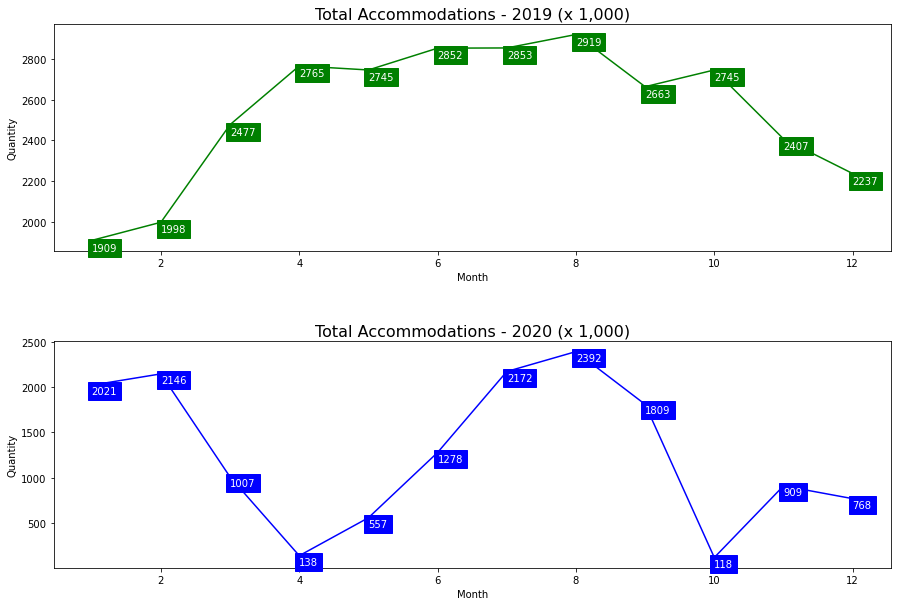

In [61]:
# Defining the figure of the plot and axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))

# Adjusting spacing among the axes
fig.subplots_adjust(hspace=0.4, wspace=0.2)

# Plotting Total Accommodations in 2019
sns.lineplot(x='month', y='Accommodations', color='green',data=data_2019, ax=ax1)

# Showing datalabels for each month in 2019 plot
show_datalabels(data_2019,ax1,'month','Accommodations',50,'green')

# Defining plot parameters of Total Accommodations in 2019
ax1.set_title('Total Accommodations - 2019 (x 1,000)', fontsize=16)
ax1.set_ylabel('Quantity')
ax1.set_xlabel('Month')

# Plotting Total Acccommodations in 2020
sns.lineplot(x='month', y='Accommodations', marker='*',color='blue',data=data_2020, ax=ax2)

# Showing datalabels for each month in 2020 plot
show_datalabels(data_2020,ax2,'month','Accommodations',100,'blue')

# Defining plot parameters of Total Accommodations in 2020
ax2.set_title('Total Accommodations - 2020 (x 1,000)', fontsize=16)
ax2.set_ylabel('Quantity')
ax2.set_xlabel('Month')

# Saving the plot into image file
plt.savefig('total_accommodations.png', bbox_inches='tight')

plt.show()

- Plot 2
** Is the hotel use higher for tourists (abroad) or residents of other cities (inland)? **

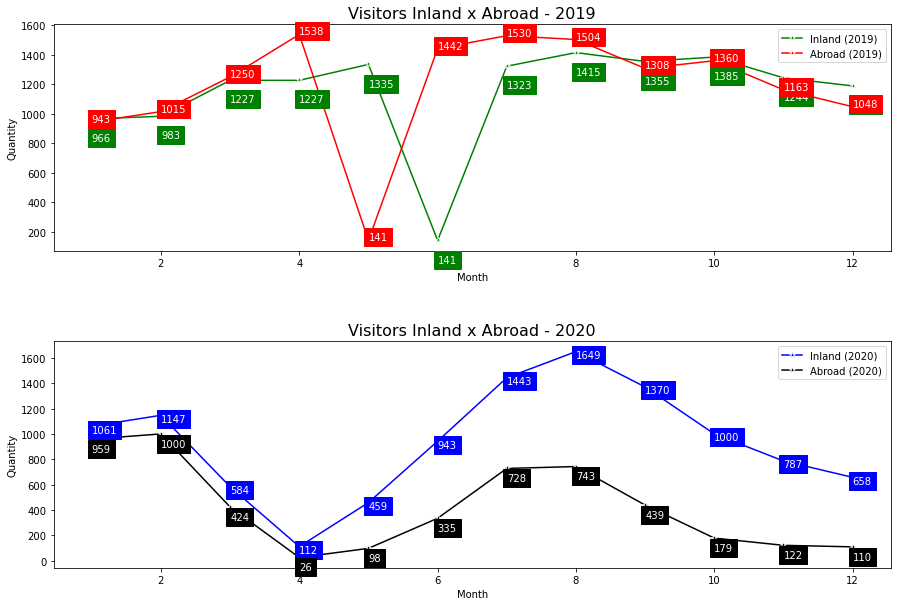

In [62]:
# Defining the figure of the plot and axes
fig, (ax3,ax4) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))

# Adjusting spacing among the axes
fig.subplots_adjust(hspace=0.4, wspace=0.2)

# Plotting Total Visitors Inland and Abroad in 2019
sns.lineplot(x='month', y='V_Inland_1000', marker='*', color='green',data=data_2019, ax=ax3, label='Inland (2019)')
sns.lineplot(x='month', y='V_Abroad_1000', marker='*', color='red',data=data_2019, ax=ax3, label='Abroad (2019)')

# Showing datalabels for each month in 2019 plot
show_datalabels(data_2019,ax3,'month','V_Inland_1000',150,'green')
show_datalabels(data_2019,ax3,'month','V_Abroad_1000',0,'red')

# Showing legend for 2019 plot
ax3.legend()

# Defining plot parameters of Visitors Inland and Abroad in 2019 plot
ax3.set_title('Visitors Inland x Abroad - 2019', fontsize=16)
ax3.set_ylabel('Quantity')
ax3.set_xlabel('Month')

# Plotting Total Visitors Inland and Abroad in 2020
sns.lineplot(x='month', y='V_Inland_1000', marker='*', color='blue',data=data_2020, ax=ax4, label='Inland (2020)')
sns.lineplot(x='month', y='V_Abroad_1000', marker='*', color='black',data=data_2020, ax=ax4, label='Abroad (2020)')

# Showing datalabels for each month in 2020 plot
show_datalabels(data_2020,ax4,'month','V_Inland_1000',50,'blue')
show_datalabels(data_2020,ax4,'month','V_Abroad_1000',100,'black')

# Defining plot parameters 
ax4.set_title('Visitors Inland x Abroad - 2020', fontsize=16)
ax4.set_ylabel('Quantity')
ax4.set_xlabel('Month')

# Showing legend
ax4.legend()

# Saving the plot
plt.savefig('visitors_inland_abroad.png', bbox_inches='tight')

plt.show()

** Which month had the most hotel usage and how was the same period for airbnb? ** <br>
** Which month had the most use of airbnb and how was the same period for the hotel? **

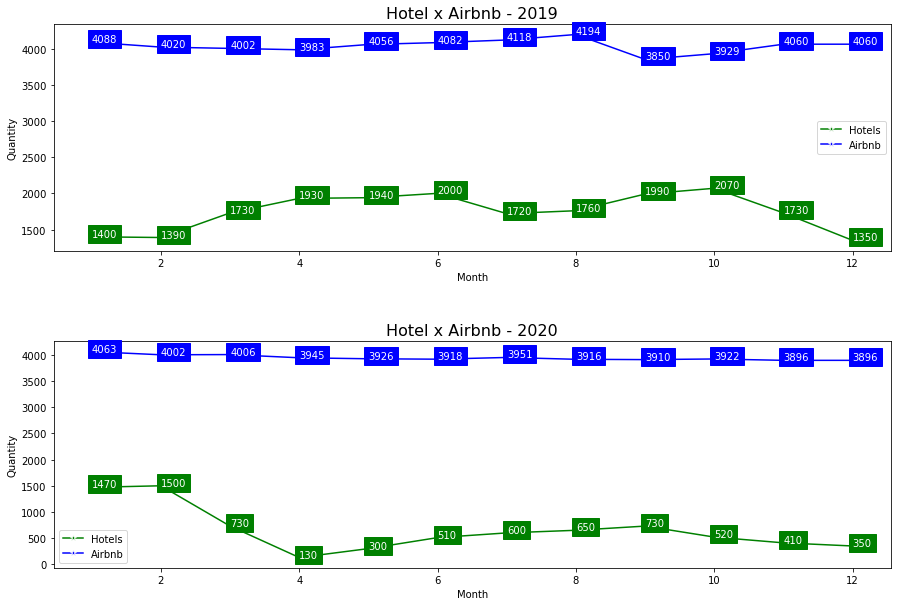

In [63]:
# Defining the figure of the plot and axes
fig, (ax4, ax5) = plt.subplots(nrows=2, ncols=1,figsize=(15,10))

# Adjusting spacing among the axes
fig.subplots_adjust(hspace=0.4, wspace=0.2)

# Plotting
sns.lineplot(x='month', y='Accomodation_B_Overstays', 
             marker='*', color='green', data=data_2019, ax=ax4, label='Hotels')
sns.lineplot(x='month', y='Priv_airbnb', 
             marker='*', color='blue', data=data_2019, ax=ax4, label='Airbnb')


# Showing datalabels
show_datalabels(data_2019,ax4,'month','Accomodation_B_Overstays',0,'green')
show_datalabels(data_2019,ax4,'month','Priv_airbnb',0,'blue')

# Defining plot parameters
ax4.set_title('Hotel x Airbnb - 2019', fontsize=16)
ax4.set_ylabel('Quantity')
ax4.set_xlabel('Month')

# Showing legend
ax4.legend()

# Plotting
sns.lineplot(x='month', y='Accomodation_B_Overstays', 
             marker='*', color='green', data=data_2020, ax=ax5, label='Hotels')
sns.lineplot(x='month', y='Priv_airbnb', 
             marker='*', color='blue', data=data_2020, ax=ax5, label='Airbnb')

# Showing datalabels
show_datalabels(data_2020,ax5,'month','Accomodation_B_Overstays',0,'green')
show_datalabels(data_2020,ax5,'month','Priv_airbnb',0,'blue')

# Defining plot parameters
ax5.set_title('Hotel x Airbnb - 2020', fontsize=16)
ax5.set_ylabel('Quantity')
ax5.set_xlabel('Month')

# Saving the plot
plt.savefig('airbnb_private_hotels.png', bbox_inches='tight')

plt.show()

- Saving preprocessed data into a **PostgreSQL** database.

In [64]:
# Creating or Removing the PostgreSQL Database (Option 0 = Removal, Option 1 = Creation)
postgre_manage_db(1,postgre_db,postgre_user,postgre_pass,postgre_hostname,postgre_port)

Database dap_project already created.


In [65]:
# Creating engine connection with PostgreSQL Database using sqlalchemy library. The Database must be created first.
postgre_engine = postgre_manage_data(postgre_db,postgre_user,postgre_pass,postgre_hostname,postgre_port)

In [66]:
# Removing conflicting "_id" column
data.drop('_id',axis=1, inplace=True)

In [ ]:
# Saving data from Pandas dataframe into a PostgreSQL database
data.to_sql(postgre_table,con=postgre_engine, if_exists='replace')

In [ ]:
# Creating PostgreSQL database connection
con = postgre_engine.connect()

In [ ]:
# Checking if the data was properly saved into a PostgreSQL database.
result = con.execute('SELECT * FROM visitors')

In [ ]:
for row in result:
    print(row)